In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart

import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm

import random

In [2]:
moi_bathy = xr.load_dataset("/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc")

In [11]:
cx_centers = moi_bathy['nav_lon'].values
cy_centers = moi_bathy['nav_lat'].values
fx_corners = (cx_centers + np.roll(cx_centers, 1, axis=1))/2
fy_corners = (cy_centers + np.roll(cy_centers, 1, axis=0))/2

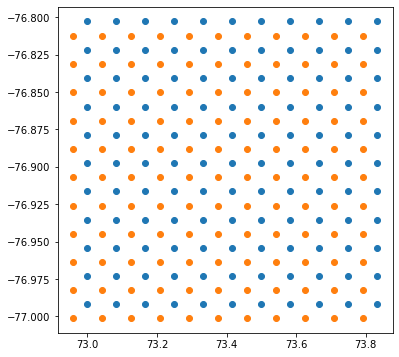

In [16]:
plt.figure(figsize=(6,6))
ran = 1
go = 12
plt.scatter(cx_centers[ran:go,ran:go], cy_centers[ran:go,ran:go])
plt.scatter(fx_corners[ran:go,ran:go], fy_corners[ran:go,ran:go])

/tmp/ipykernel_377127/1917625054.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xcorn, ycorn, tcorn, cmap='Blues',edgecolors='k',linewidth=1)


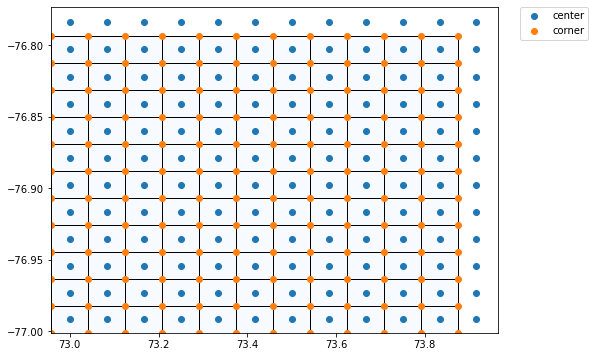

In [27]:
fig = plt.figure(figsize=(8,6))
# fig.suptitle('Figure 5 - C grid structure', fontsize=16)
ax1=plt.axes()

# ax1.set_xlim(105, 112)
# ax1.set_ylim(50, 54)

ran = 1
go = 13
xcorn, ycorn = fx_corners[ran:go,ran:go], fy_corners[ran:go,ran:go], 
tcorn = np.zeros_like(xcorn)
ax1.pcolormesh(xcorn, ycorn, tcorn, cmap='Blues',edgecolors='k',linewidth=1)
plt.scatter(cx_centers[ran:go,ran:go], cy_centers[ran:go,ran:go], label='center')
plt.scatter(fx_corners[ran:go,ran:go], fy_corners[ran:go,ran:go], label='corner')

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Vertical grid

In [32]:
lat_obs = -32.171
lon_obs = 6.287

lon_rest = abs(moi_bathy['nav_lon'][0,:] - lon_obs)
lat_rest = abs(moi_bathy['nav_lat'][:,0] - lat_obs)
lon_index = np.where(lon_rest == lon_rest.min())[0][0]
lat_index = np.where(lat_rest == lat_rest.min())[0][0]

In [33]:
lat_index

1086

In [28]:
w = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2021-11-27.nc')

In [31]:
xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/mesh_zgr.nc')

<xarray.Dataset>
Dimensions:       (y: 3059, x: 4322, z: 75, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/17)
    nav_lon       (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
    nav_lev       (z) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_counter  (t) float64 0.0
    mbathy        (t, y, x) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    e3t_0         (t, z, y, x) float64 1.023 1.023 1.023 1.023 ... 204.2 nan nan
    ...            ...
    gdepv         (t, z, y, x) float32 0.5058 0.5058 0.5058 ... nan nan
    gdepw_0       (t, z, y, x) float32 nan nan nan nan ... 5.8e+03 nan nan
    gdept_1d      (t, z) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    gdepw_1d      (t, z) float64 nan 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
    e3t_1d        (t, z) float64 1.023 1.079 1.147 1.233 ... 203.2 203.8 204.2
    e3w_1d        (t, z) float64 1.0 1.05 1.111 1.188 ... 202.9 203.5 204.0
Attributes:
    DOMAIN_number_total:  8972
    DOMAIN_size_global:   [4322 3059]

In [30]:
-w['depthw']

<xarray.DataArray 'depthw' (depthw: 50)>
array([-0.00000000e+00, -1.01127517e+00, -2.08567595e+00, -3.22300124e+00,
       -4.43716145e+00, -5.74513674e+00, -7.16765165e+00, -8.72999573e+00,
       -1.04630241e+01, -1.24043722e+01, -1.45999317e+01, -1.71056423e+01,
       -1.99896641e+01, -2.33349934e+01, -2.72426338e+01, -3.18353996e+01,
       -3.72624855e+01, -4.37048988e+01, -5.13819351e+01, -6.05588074e+01,
       -7.15555344e+01, -8.47572784e+01, -1.00626091e+02, -1.19714096e+02,
       -1.42677887e+02, -1.70293854e+02, -2.03473526e+02, -2.43278076e+02,
       -2.90930267e+02, -3.47821594e+02, -4.15511902e+02, -4.95718384e+02,
       -5.90290100e+02, -7.01165771e+02, -8.30311890e+02, -9.79643372e+02,
       -1.15092847e+03, -1.34568701e+03, -1.56509058e+03, -1.80988000e+03,
       -2.08030859e+03, -2.37612305e+03, -2.69658252e+03, -3.04051538e+03,
       -3.40640186e+03, -3.79247363e+03, -4.19681592e+03, -4.61746240e+03,
       -5.05247412e+03, -5.50000146e+03])
Coordinates:
  * depthw        (depthw) float64 0.0 1.011 2.086 ... 5.052e+03 5.5e+03
    time_counter  datetime64[ns] 2021-11-27T12:00:00
Attributes:
    units:          m
    positive:       down
    valid_min:      0.0
    valid_max:      5500.00146484375
    long_name:      Vertical T levels
    standard_name:  depth
    axis:           Z

In [19]:
moi_bathy['nav_lat'] == cy_centers

<xarray.DataArray 'nav_lat' (y: 3059, x: 4322)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True, False,  True, ..., False,  True, False],
       [ True, False,  True, ..., False,  True, False],
       [ True, False,  True, ..., False,  True, False]])
Dimensions without coordinates: y, x

In [16]:
cx_centers.shape

(3059, 4322)

NameError: name 'fx_corners' is not defined

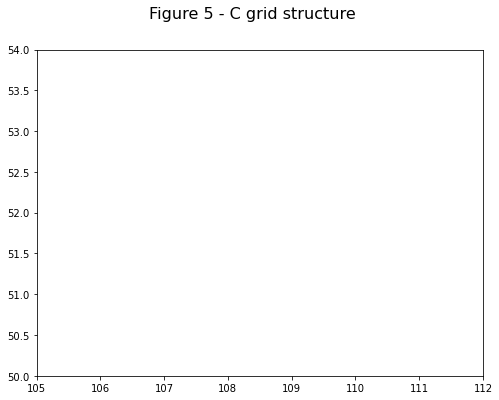

In [2]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('Figure 5 - C grid structure', fontsize=16)
ax1=plt.axes()

ax1.set_xlim(105, 112)
ax1.set_ylim(50, 54)
ax1.pcolormesh(fx_corners,fy_corners,cudmask,cmap='Blues',edgecolors='k',linewidth=1)
ax1.scatter(xu_corners,yu_corners, s=80,c=cufields['uos'][0],cmap='seismic',vmin=-0.1,vmax=0.1,edgecolor='k', label = 'U')
ax1.scatter(xv_corners,yv_corners, s=80,c=cvfields['vos'][0],cmap='PRGn',vmin=-0.1,vmax=0.1,edgecolor='k', label = 'V')
ax1.scatter(cx_centers,cy_centers, s=80,c='orange',edgecolor='k', label = 'T')
ax1.quiver(xu_corners,yu_corners,cufields['uos'][0],np.zeros(xu_corners.shape),angles='xy', scale_units='xy', scale=0.1, width=0.007)
ax1.quiver(xv_corners,yv_corners,np.zeros(xv_corners.shape),cvfields['vos'][0],angles='xy', scale_units='xy', scale=0.3, width=0.007)

custom_lines = [Line2D([0], [0], marker='o', color='r',lw=0),
                Line2D([0], [0], marker='o', color='g', lw=0),
                Line2D([0], [0], marker='o', color='orange', lw=0)]

ax1.legend(custom_lines, ['U', 'V', 'T'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)